In [2]:
import pandas as pd

In [3]:
timeseries = pd.read_parquet('../data/interim/comb_trips.gzip').set_index('started_at')
timeseries.index.name='date'
weekly = timeseries.resample('1W').count().ended_at

In [4]:
timeseries.groupby('member_casual').count().ended_at.sum()

31025537

In [5]:
membertrips_week = timeseries[timeseries.member_casual == 'member'].resample('1W').count().ended_at
casualtrips_week = timeseries[timeseries.member_casual == 'casual'].resample('1W').count().ended_at

In [6]:
membertrips_week.name = 'member trips'
casualtrips_week.name = 'non-member trips'

In [7]:
weekly

date
2010-09-26     2724
2010-10-03     3200
2010-10-10     5602
2010-10-17     7595
2010-10-24     9359
              ...  
2021-12-05    54940
2021-12-12    49397
2021-12-19    48238
2021-12-26    27864
2022-01-02    22997
Freq: W-SUN, Name: ended_at, Length: 589, dtype: int64

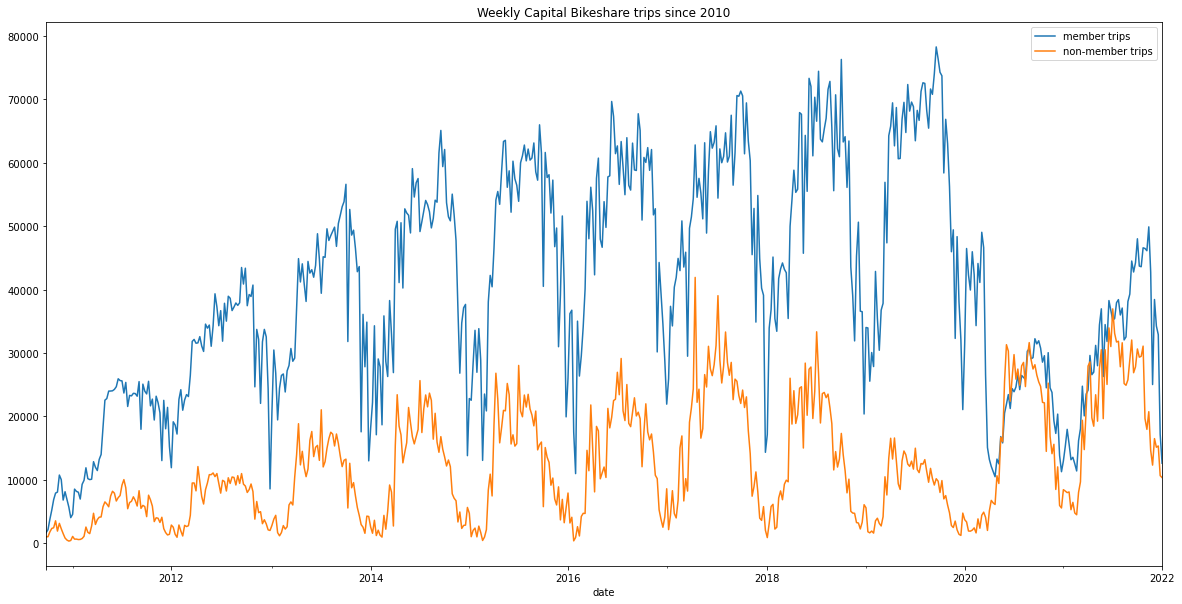

In [26]:
ax = combined_timseries = pd.merge_asof(membertrips_week,casualtrips_week,left_index=True,right_index=True).plot(figsize=(20,10),title='Weekly Capital Bikeshare trips since 2010')
fig = ax.get_figure()
fig.savefig('../reports/figures/weekly_trips.png',bbox_inches='tight',facecolor='w',dpi=200)


In [13]:
casualtrips_week[casualtrips_week.argmax()]
casualtrips_week.index[casualtrips_week.argmax()]

Timestamp('2017-04-16 00:00:00', freq='W-SUN')

<AxesSubplot:xlabel='date'>

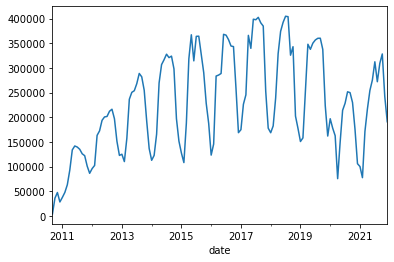

In [16]:
timeseries.resample('1M').count().ended_at.plot()